In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Importing the dataset

In [19]:
data=pd.read_csv("50_Startups_MR.csv")

Checking for null values

In [20]:
print(data.isna().sum())

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64


In [21]:
print(data.head())

   R&D Spend  Administration  Marketing Spend       State     Profit
0  165349.20       136897.80        471784.10    New York  192261.83
1  162597.70       151377.59        443898.53  California  191792.06
2  153441.51       101145.55        407934.54     Florida  191050.39
3  144372.41       118671.85        383199.62    New York  182901.99
4  142107.34        91391.77        366168.42     Florida  166187.94


Dividing dataset into dependent and independent data

In [22]:
X=data.iloc[:,:-1].values
Y=data.iloc[:,-1].values

Splitting the dataset into train,test,split

In [23]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

Encoding the categorical data into numerical data

In [24]:
from sklearn.preprocessing import LabelEncoder
obj=LabelEncoder()
x_train[:,-1]=obj.fit_transform(x_train[:,-1])
x_test[:,-1]=obj.transform(x_test[:,-1])


# from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import OneHotEncoder
# obj=ColumnTransformer(transformers=[('encode',OneHotEncoder(),[-1])],remainder='passthrough')
# x_train=obj.fit_transform(x_train)
# x_test=obj.transform(x_test)

In [25]:
print(x_train)
print()
print(x_test)

[[55493.95 103057.49 214634.81 1]
 [46014.02 85047.44 205517.64 2]
 [75328.87 144135.98 134050.07 1]
 [46426.07 157693.92 210797.67 0]
 [91749.16 114175.79 294919.57 1]
 [130298.13 145530.06 323876.68 1]
 [119943.24 156547.42 256512.92 1]
 [1000.23 124153.04 1903.93 2]
 [542.05 51743.15 0.0 2]
 [65605.48 153032.06 107138.38 2]
 [114523.61 122616.84 261776.23 2]
 [61994.48 115641.28 91131.24 1]
 [63408.86 129219.61 46085.25 0]
 [78013.11 121597.55 264346.06 0]
 [23640.93 96189.63 148001.11 0]
 [76253.86 113867.3 298664.47 0]
 [15505.73 127382.3 35534.17 2]
 [120542.52 148718.95 311613.29 2]
 [91992.39 135495.07 252664.93 0]
 [64664.71 139553.16 137962.62 0]
 [131876.9 99814.71 362861.36 2]
 [94657.16 145077.58 282574.31 2]
 [28754.33 118546.05 172795.67 0]
 [0.0 116983.8 45173.06 0]
 [162597.7 151377.59 443898.53 0]
 [93863.75 127320.38 249839.44 1]
 [44069.95 51283.14 197029.42 0]
 [77044.01 99281.34 140574.81 2]
 [134615.46 147198.87 127716.82 0]
 [67532.53 105751.03 304768.73 1]
 [28

Feature Scaling...

In [26]:
from sklearn.preprocessing import StandardScaler,normalize
ob=StandardScaler()
x_train=ob.fit_transform(x_train)
x_test=ob.transform(x_test)

# x_train=normalize(x_train)
# x_test=normalize(x_test)

Preparing Multiple linear Regression model...

In [27]:
from sklearn.linear_model import LinearRegression
regress=LinearRegression()
regress.fit(x_train,y_train)

LinearRegression()

Predicting the test data by using Regression model

In [28]:
y_pred=regress.predict(x_test)

Comparing the original and predicted data.....

In [29]:
print(np.concatenate((y_test.reshape(len(y_test),1),y_pred.reshape(len(y_pred),1)),axis=1))

[[103282.38       103959.40508021]
 [144259.4        132398.73236694]
 [146121.95       133529.03790148]
 [ 77798.83        72958.28368314]
 [191050.39       179534.78737166]
 [105008.31       115533.62584099]
 [ 81229.06        67476.95847883]
 [ 97483.56        98504.36199396]
 [110352.25       114789.16083781]
 [166187.94       168972.21909945]]


Predicting random_data....

In [30]:
#Predicting random_data by using OneHotEncoder...
# standsacal=obj.transform([[100671.96,91790.61,249744.55,"California"]])
# print(standsacal)

# print(regress.predict(ob.transform(standsacal)))

#Predicting random_data by using LabelEncoder...
print(regress.predict(ob.transform([[100671.96,91790.61,249744.55,obj.transform(["California"])[0]]])))


[132398.73236694]


Visualizing the performance of model on test data...

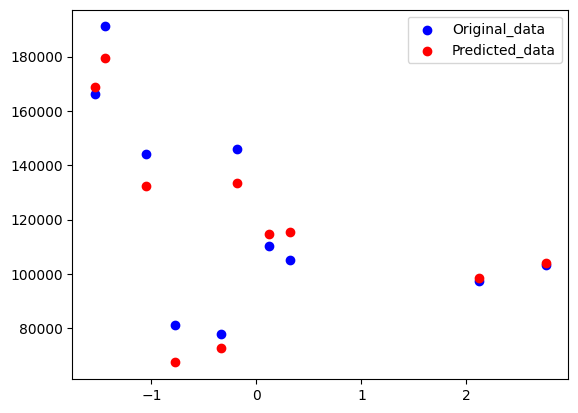

In [31]:
from sklearn.decomposition import PCA
pca=PCA(n_components=1)
X=pca.fit_transform(x_test)


plt.scatter(X,y_test,color="blue",label="Original_data")
plt.scatter(X,y_pred,color="red",label="Predicted_data")
plt.legend()
plt.show()

In [32]:
from sklearn.metrics import r2_score
print("Model accuracy : ",r2_score(y_test,y_pred))

Model accuracy :  0.9386861070938133
